In [59]:
import pandas as pd
import numpy

data = pd.read_csv("homedata.csv", index_col = "Id")

In [60]:
# Step 1:
feature = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
data_df = data[feature]
# data_df

In [61]:
# Step 4:
X = data_df
Y = data["SalePrice"]

from sklearn.model_selection import train_test_split

numpy.random.seed(1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
# X_train
# X_test
# Y_train
# Y_test

In [62]:
# Step 6 + 7:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 1)
dt_model.fit(X_train, Y_train)

Y_predict = dt_model.predict(X_test)
# print(Y_predict)
# print(Y_test)

#Compare:
comp = pd.DataFrame({"Real price": Y_test, "Predict price": Y_predict})
# comp

In [63]:
# Use other model:
from sklearn.linear_model import LinearRegression

dt_model = LinearRegression()
dt_model.fit(X_train, Y_train)

Y_predict = dt_model.predict(X_test)

#Compare:
comp = pd.DataFrame({"Real price": Y_test, "Predict price": Y_predict})
print(comp)

      Real price  Predict price
Id                             
259       231500  223824.997383
268       179500  158038.215824
289       122000  108984.727542
650        84500  101842.897851
1234      142000  140651.375556
...          ...            ...
164       103200  125397.988980
48        249700  239676.034594
1433       64500   66871.865979
99         83000   81325.326083
410       339750  258575.843205

[292 rows x 2 columns]


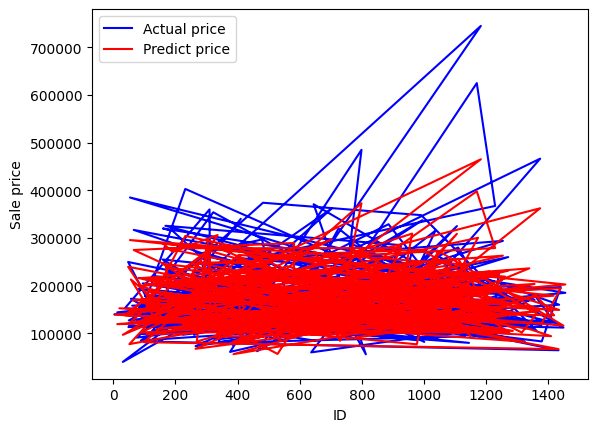

In [64]:
# Draw
import matplotlib.pyplot as plt

X_id = numpy.array(comp.index)

plt.plot(X_id, Y_test, 'b-', X_id, Y_predict, 'r-')
plt.xlabel("ID")
plt.ylabel("Sale price")
plt.legend(["Actual price", "Predict price"])

In [65]:
from sklearn.metrics import r2_score

acc = r2_score(Y_test, Y_predict)
print(acc)

0.7635426607353283
